In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import numpy as np

In [2]:
data_consumption = pd.read_excel("statistic_id871513_amount-of-data-created-consumed-and-stored-2010-2023-with-forecasts-to-2028.xlsx",
                                sheet_name = "Data", skiprows = 4)

In [3]:
data_consumption = data_consumption[["Unnamed: 1", "Unnamed: 2"]]
data_consumption.columns = ["Year", "Data"]
data_consumption["Year"] = pd.to_datetime(data_consumption["Year"], format='%Y').dt.year
data_consumption

,Year,Data
0,2010,2.0
1,2011,5.0
2,2012,6.5
3,2013,9.0
4,2014,12.5
5,2015,15.5
6,2016,18.0
7,2017,26.0
8,2018,33.0
9,2019,41.0


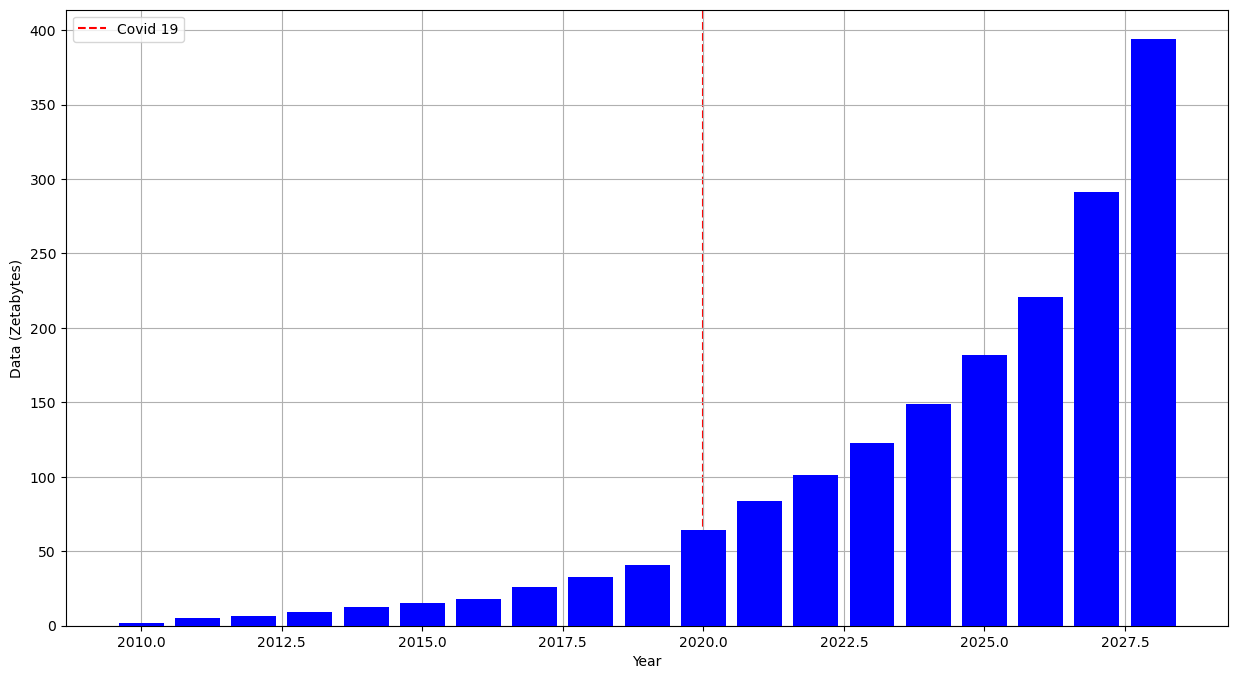

In [4]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.bar(x = data_consumption["Year"], height = data_consumption["Data"], color = "blue", zorder = 3)

plt.grid(which = "both", zorder = 0)
#plt.minorticks_on()

plt.axvline(2020, linestyle = "--", color = "red", zorder = 0, label = "Covid 19")

plt.xlabel("Year")
plt.ylabel("Data (Zetabytes)")
plt.legend()

plt.show()

In [5]:
data_consumption["Growth Rate"] = data_consumption["Data"].pct_change()
data_consumption

,Year,Data,Growth Rate
0,2010,2.0,NaN
1,2011,5.0,1.500000
2,2012,6.5,0.300000
3,2013,9.0,0.384615
4,2014,12.5,0.388889
5,2015,15.5,0.240000
6,2016,18.0,0.161290
7,2017,26.0,0.444444
8,2018,33.0,0.269231
9,2019,41.0,0.242424


In [6]:
growth_rates = [x for x in data_consumption["Growth Rate"].dropna().tolist() if x != "nan"]
growth_rates

[1.5,
 0.30000000000000004,
 0.3846153846153846,
 0.38888888888888884,
 0.24,
 0.16129032258064524,
 0.4444444444444444,
 0.26923076923076916,
 0.24242424242424243,
 0.5609756097560976,
 0.3125,
 0.20238095238095233,
 0.2178217821782178,
 0.21138211382113825,
 0.2214765100671141,
 0.2142857142857142,
 0.3167420814479638,
 0.35395189003436434]

In [7]:
shape, loc, scale = lognorm.fit(growth_rates, floc = 0)
x = np.linspace(min(growth_rates), max(growth_rates), 100)
pdf_values = lognorm.pdf(x, shape, loc = loc, scale = scale)

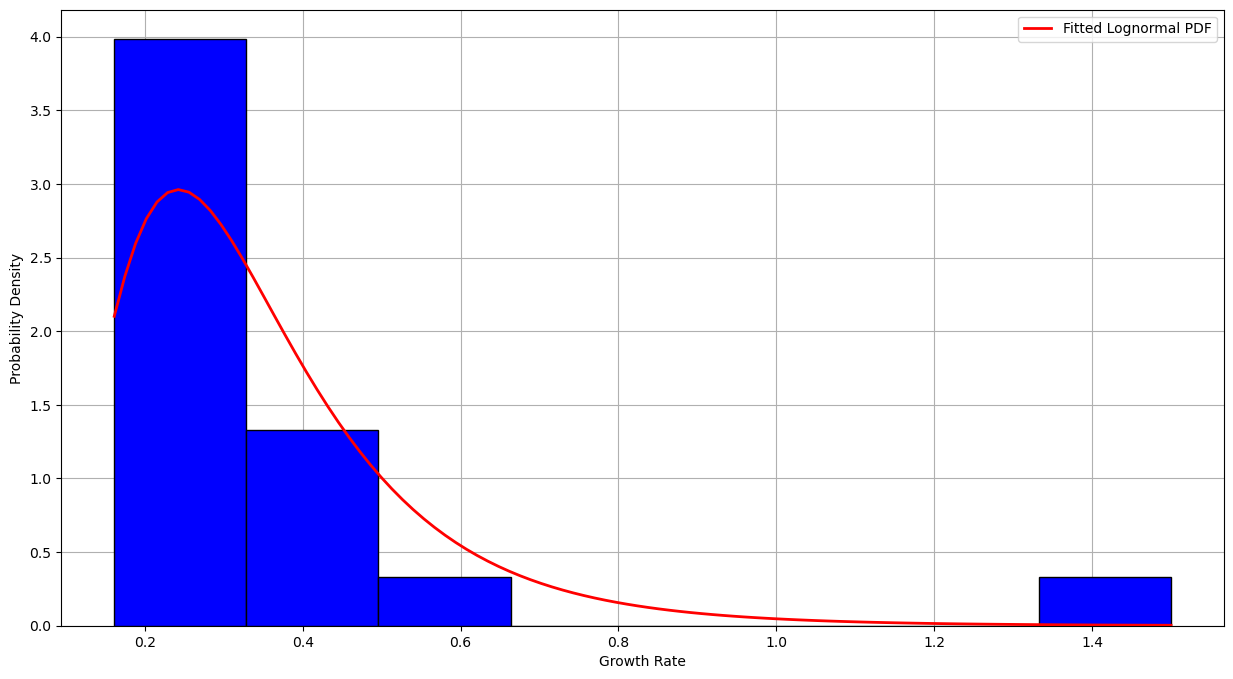

In [8]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.hist(growth_rates, bins=8, density=True, color='blue', edgecolor='black', zorder = 3)
plt.plot(x, pdf_values, 'r-', linewidth=2, label='Fitted Lognormal PDF', zorder = 4)

plt.grid(which = "both", zorder = 0)
#plt.minorticks_on()
plt.xlabel("Growth Rate")
plt.ylabel("Probability Density")

plt.legend()

plt.show()

In [9]:
mean_rate = lognorm.mean(shape, loc=loc, scale=scale)

# Get the 5th and 95th percentile growth rates 
p5_rate  = lognorm.ppf(0.05, shape, loc=loc, scale=scale)
p80_rate = lognorm.ppf(0.8, shape, loc=loc, scale=scale)
p95_rate = lognorm.ppf(0.95, shape, loc=loc, scale=scale)

print("Lognormal parameters:")
print(f"  shape={shape:.4f}, loc={loc}, scale={scale:.4f}")
print("Derived statistics:")
print(f"  Mean rate     = {mean_rate:.4f}")
print(f"  5% quantile   = {p5_rate:.4f}")
print(f"  80% quantile  = {p80_rate:.4f}")
print(f"  95% quantile  = {p95_rate:.4f}")

Lognormal parameters:
  shape=0.4921, loc=0, scale=0.3089
Derived statistics:
  Mean rate     = 0.3487
  5% quantile   = 0.1375
  80% quantile  = 0.4675
  95% quantile  = 0.6941


In [10]:
# Last historical consumption value
last_value = data_consumption["Data"].iloc[-1]

# Lists to store forecasts for each scenario
data_consumption_mean_prediction = []
data_consumption_low_prediction  = []
data_consumption_high_prediction = []
data_consumption_extreme_prediction = []

# Forecast horizon: 2028 to 2035 -> 8 years
future_years = range(2028, 2028 + 8)

for i in range(8):
    # i = number of years after 2027
    # Simple exponential growth: new_value = last_value * exp(growth_rate * years)
    # This is an example approach; adapt as needed.
    data_consumption_mean_prediction.append(last_value * np.exp(mean_rate * i))
    data_consumption_low_prediction.append(last_value  * np.exp(p5_rate  * i))
    data_consumption_high_prediction.append(last_value * np.exp(p80_rate * i))
    data_consumption_extreme_prediction.append(last_value * np.exp(p95_rate * i))

In [11]:
data_consumption_high_prediction

[394.0,
 628.7951369057093,
 1003.510975117436,
 1601.5300025008885,
 2555.9245613734706,
 4079.0683616484694,
 6509.894286574863,
 10389.314388752631]

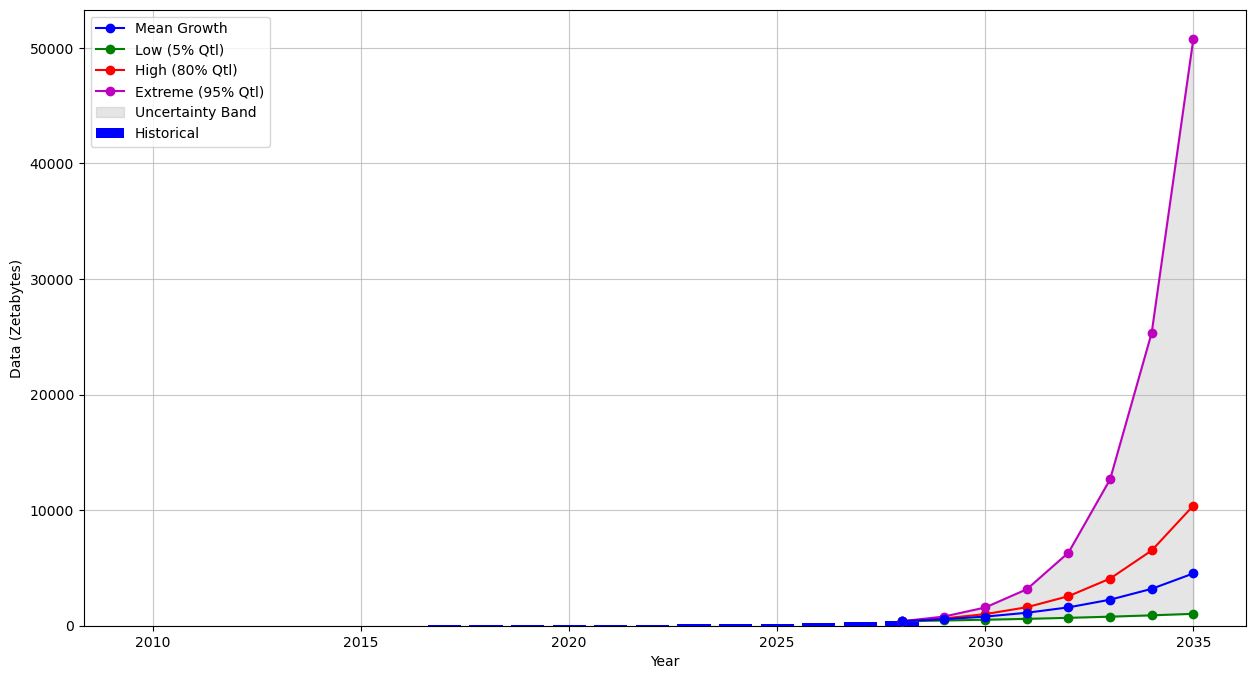

In [12]:
plt.rcParams["font.size"] = 10
plt.figure(figsize=(15, 8))

# Plot historical bar chart
plt.bar(
    data_consumption["Year"], 
    data_consumption["Data"], 
    color="blue", 
    label="Historical", 
    zorder=3
)

# Plot forecast lines
plt.plot(future_years, data_consumption_mean_prediction, "b-o", label="Mean Growth",   zorder=5)
plt.plot(future_years, data_consumption_low_prediction,  "g-o", label="Low (5% Qtl)", zorder=4)
plt.plot(future_years, data_consumption_high_prediction, "r-o", label="High (80% Qtl)",zorder=4)
plt.plot(future_years, data_consumption_extreme_prediction, "m-o", label="Extreme (95% Qtl)",zorder=4)

# Shade the area between low and high
plt.fill_between(
    future_years,
    data_consumption_low_prediction,
    data_consumption_extreme_prediction,
    color="gray",
    alpha=0.2,
    label="Uncertainty Band"
)

plt.grid(which="both", zorder=0, alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Data (Zetabytes)")
#plt.title("Forecast with Lognormal Growth Rate Scenarios")
plt.legend()
plt.show()

In [13]:
len(data_consumption_low_prediction)

8

In [14]:
data_consumption_to_2028 = data_consumption["Data"].tolist()

In [15]:
data_consumption_to_2028

[2.0,
 5.0,
 6.5,
 9.0,
 12.5,
 15.5,
 18.0,
 26.0,
 33.0,
 41.0,
 64.0,
 84.0,
 101.0,
 123.0,
 149.0,
 182.0,
 221.0,
 291.0,
 394.0]

In [16]:
data_consumption_mean_prediction.remove(394)

In [17]:
len(data_consumption_mean_prediction)

7

In [18]:
data_consumption_low_prediction.remove(394)

In [19]:
len(data_consumption_low_prediction)

7

In [20]:
data_consumption_high_prediction.remove(394)

In [21]:
len(data_consumption_high_prediction)

7

In [22]:
data_consumption_extreme_prediction.remove(394)

In [23]:
len(data_consumption_extreme_prediction)

7

In [24]:
data_consumption_mean_cum_sum = data_consumption_to_2028.copy()
data_consumption_low_cum_sum = data_consumption_to_2028.copy()
data_consumption_high_cum_sum = data_consumption_to_2028.copy()
data_consumption_extreme_cum_sum = data_consumption_to_2028.copy()

In [25]:
data_consumption_mean_cum_sum

[2.0,
 5.0,
 6.5,
 9.0,
 12.5,
 15.5,
 18.0,
 26.0,
 33.0,
 41.0,
 64.0,
 84.0,
 101.0,
 123.0,
 149.0,
 182.0,
 221.0,
 291.0,
 394.0]

In [26]:
len(data_consumption_mean_cum_sum)

19

In [27]:
len(data_consumption_low_cum_sum)

19

In [28]:
len(data_consumption_high_cum_sum)

19

In [29]:
for i in data_consumption_mean_prediction:
    
    print(i)
    data_consumption_mean_cum_sum.append(i)

558.3863031852179
791.3585370173961
1121.5324060385947
1589.4627769297301
2252.624984924626
3192.474461407917
4524.451808423316


In [30]:
len(data_consumption_mean_cum_sum)

26

In [31]:
data_consumption_mean_cum_sum = np.cumsum(data_consumption_mean_cum_sum)
len(data_consumption_mean_cum_sum)

data_consumption_mean_cum_sum

array([2.00000000e+00, 7.00000000e+00, 1.35000000e+01, 2.25000000e+01,
       3.50000000e+01, 5.05000000e+01, 6.85000000e+01, 9.45000000e+01,
       1.27500000e+02, 1.68500000e+02, 2.32500000e+02, 3.16500000e+02,
       4.17500000e+02, 5.40500000e+02, 6.89500000e+02, 8.71500000e+02,
       1.09250000e+03, 1.38350000e+03, 1.77750000e+03, 2.33588630e+03,
       3.12724484e+03, 4.24877725e+03, 5.83824002e+03, 8.09086501e+03,
       1.12833395e+04, 1.58077913e+04])

In [32]:
for i in data_consumption_low_prediction:

    print(i)
    data_consumption_low_cum_sum.append(i)

452.0773630667911
518.7155893335616
595.1765883440434
682.9082807554929
783.5720172091856
899.0740388651137
1031.60157536028


In [33]:
data_consumption_low_cum_sum = np.cumsum(data_consumption_low_cum_sum)
data_consumption_low_cum_sum

array([2.00000000e+00, 7.00000000e+00, 1.35000000e+01, 2.25000000e+01,
       3.50000000e+01, 5.05000000e+01, 6.85000000e+01, 9.45000000e+01,
       1.27500000e+02, 1.68500000e+02, 2.32500000e+02, 3.16500000e+02,
       4.17500000e+02, 5.40500000e+02, 6.89500000e+02, 8.71500000e+02,
       1.09250000e+03, 1.38350000e+03, 1.77750000e+03, 2.22957736e+03,
       2.74829295e+03, 3.34346954e+03, 4.02637782e+03, 4.80994984e+03,
       5.70902388e+03, 6.74062545e+03])

In [34]:
len(data_consumption_low_cum_sum)

26

In [35]:
for i in data_consumption_high_prediction:

    print(i)
    data_consumption_high_cum_sum.append(i)

628.7951369057093
1003.510975117436
1601.5300025008885
2555.9245613734706
4079.0683616484694
6509.894286574863
10389.314388752631


In [36]:
data_consumption_high_cum_sum = np.cumsum(data_consumption_high_cum_sum)
data_consumption_high_cum_sum

array([2.00000000e+00, 7.00000000e+00, 1.35000000e+01, 2.25000000e+01,
       3.50000000e+01, 5.05000000e+01, 6.85000000e+01, 9.45000000e+01,
       1.27500000e+02, 1.68500000e+02, 2.32500000e+02, 3.16500000e+02,
       4.17500000e+02, 5.40500000e+02, 6.89500000e+02, 8.71500000e+02,
       1.09250000e+03, 1.38350000e+03, 1.77750000e+03, 2.40629514e+03,
       3.40980611e+03, 5.01133611e+03, 7.56726068e+03, 1.16463290e+04,
       1.81562233e+04, 2.85455377e+04])

In [37]:
for i in data_consumption_extreme_prediction:

    print(i)
    data_consumption_extreme_cum_sum.append(i)

788.7393115130795
1578.9586333150419
3160.880064336393
6327.691283553566
12667.256006236938
25358.2811703534
50764.145257511766


In [38]:
data_consumption_extreme_cum_sum = np.cumsum(data_consumption_extreme_cum_sum)
data_consumption_extreme_cum_sum

array([2.00000000e+00, 7.00000000e+00, 1.35000000e+01, 2.25000000e+01,
       3.50000000e+01, 5.05000000e+01, 6.85000000e+01, 9.45000000e+01,
       1.27500000e+02, 1.68500000e+02, 2.32500000e+02, 3.16500000e+02,
       4.17500000e+02, 5.40500000e+02, 6.89500000e+02, 8.71500000e+02,
       1.09250000e+03, 1.38350000e+03, 1.77750000e+03, 2.56623931e+03,
       4.14519794e+03, 7.30607801e+03, 1.36337693e+04, 2.63010253e+04,
       5.16593065e+04, 1.02423452e+05])

In [39]:
len(data_consumption_extreme_cum_sum)

26

In [40]:
energy_consumption_mean = []
energy_consumption_low = []
energy_consumption_high = []
energy_consumption_extreme = []

In [41]:
seconds_in_a_year = 365 * 24 * 60 * 60 # seconds in a year
energy_capacity_h100 = 700 # Watts

In [42]:
for i in data_consumption_mean_cum_sum:

    energy_consumption_mean.append(seconds_in_a_year * energy_capacity_h100 * 1e-12 * i * 1.56)

In [43]:
energy_consumption_mean

[0.068874624,
 0.241061184,
 0.46490371199999997,
 0.77483952,
 1.20530592,
 1.739084256,
 2.358955872,
 3.254325984,
 4.39075728,
 5.802687072,
 8.00667504,
 10.899409248000001,
 14.37757776,
 18.613367136,
 23.744526624,
 30.012117407999998,
 37.62276336,
 47.644021152,
 61.21232208,
 80.44164541931595,
 107.69390626244757,
 146.31646764730934,
 201.05329320882487,
 278.6276426336695,
 388.5678817132059,
 544.3778402688438]

In [44]:
for i in data_consumption_low_cum_sum:

    energy_consumption_low.append(seconds_in_a_year * energy_capacity_h100 * 1e-12 * i * 1.56)

In [45]:
energy_consumption_low

[0.068874624,
 0.241061184,
 0.46490371199999997,
 0.77483952,
 1.20530592,
 1.739084256,
 2.358955872,
 3.254325984,
 4.39075728,
 5.802687072,
 8.00667504,
 10.899409248000001,
 14.37757776,
 18.613367136,
 23.744526624,
 30.012117407999998,
 37.62276336,
 47.644021152,
 61.21232208,
 76.78065128006835,
 94.64382186921209,
 115.14010373711149,
 138.65762926887197,
 165.64174329997408,
 196.60343648747212,
 232.1290217978456]

In [46]:
for i in data_consumption_high_cum_sum:

    energy_consumption_high.append(seconds_in_a_year * energy_capacity_h100 * 1e-12 * i * 1.56)

In [47]:
energy_consumption_high

[0.068874624,
 0.241061184,
 0.46490371199999997,
 0.77483952,
 1.20530592,
 1.739084256,
 2.358955872,
 3.254325984,
 4.39075728,
 5.802687072,
 8.00667504,
 10.899409248000001,
 14.37757776,
 18.613367136,
 23.744526624,
 30.012117407999998,
 37.62276336,
 47.644021152,
 61.21232208,
 82.86633639370461,
 117.424556939248,
 172.57694531273185,
 260.5961168812132,
 401.0682667206304,
 625.2515273544265,
 983.0315884259901]

In [48]:
for i in data_consumption_extreme_cum_sum:

    energy_consumption_extreme.append(seconds_in_a_year * energy_capacity_h100 * 1e-12 * i * 1.56)

In [49]:
energy_consumption_extreme

[0.068874624,
 0.241061184,
 0.46490371199999997,
 0.77483952,
 1.20530592,
 1.739084256,
 2.358955872,
 3.254325984,
 4.39075728,
 5.802687072,
 8.00667504,
 10.899409248000001,
 14.37757776,
 18.613367136,
 23.744526624,
 30.012117407999998,
 37.62276336,
 47.644021152,
 61.21232208,
 88.3743838372411,
 142.7494749278048,
 251.60168789793724,
 469.5103668693518,
 905.7366141400071,
 1779.0076545871923,
 3527.188363233445]

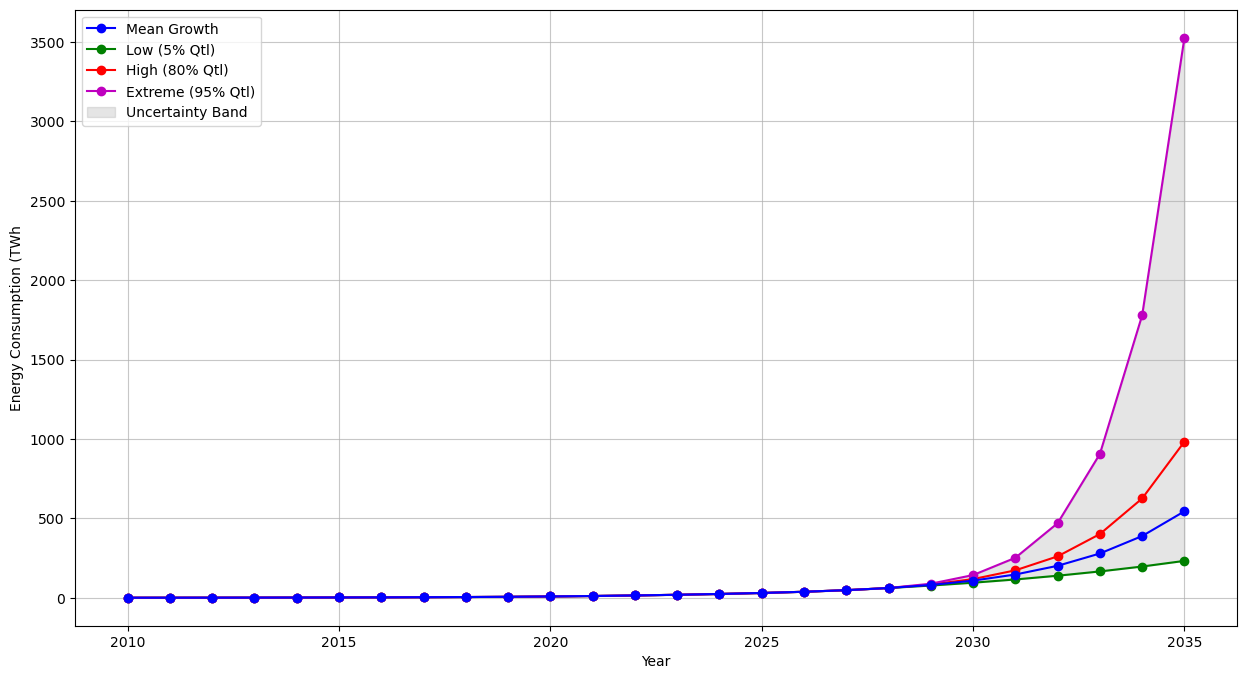

In [50]:
plt.rcParams["font.size"] = 10
plt.figure(figsize=(15, 8))

all_years = range(2010, 2036)

# Plot forecast lines
plt.plot(all_years, energy_consumption_mean, "b-o", label="Mean Growth", zorder=5)
plt.plot(all_years, energy_consumption_low,  "g-o", label="Low (5% Qtl)", zorder=4)
plt.plot(all_years, energy_consumption_high, "r-o", label="High (80% Qtl)", zorder=4)
plt.plot(all_years, energy_consumption_extreme, "m-o", label="Extreme (95% Qtl)", zorder=4)

# Shade the area between low and high
plt.fill_between(
    all_years,
    energy_consumption_low,
    energy_consumption_extreme,
    color="gray",
    alpha=0.2,
    label="Uncertainty Band"
)

plt.grid(which="both", zorder=0, alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh")
#plt.title("Forecast with Lognormal Growth Rate Scenarios")
plt.legend()
plt.show()

In [51]:
pue = pd.read_excel("statistic_id1229367_global-data-center-average-annual-power-usage-effectiveness--pue--2007-2024.xlsx",
                   sheet_name = "Data", skiprows = 4)

In [52]:
pue = pue[["Unnamed: 1", "Unnamed: 2"]]
pue.columns = ["Year", "PUE"]

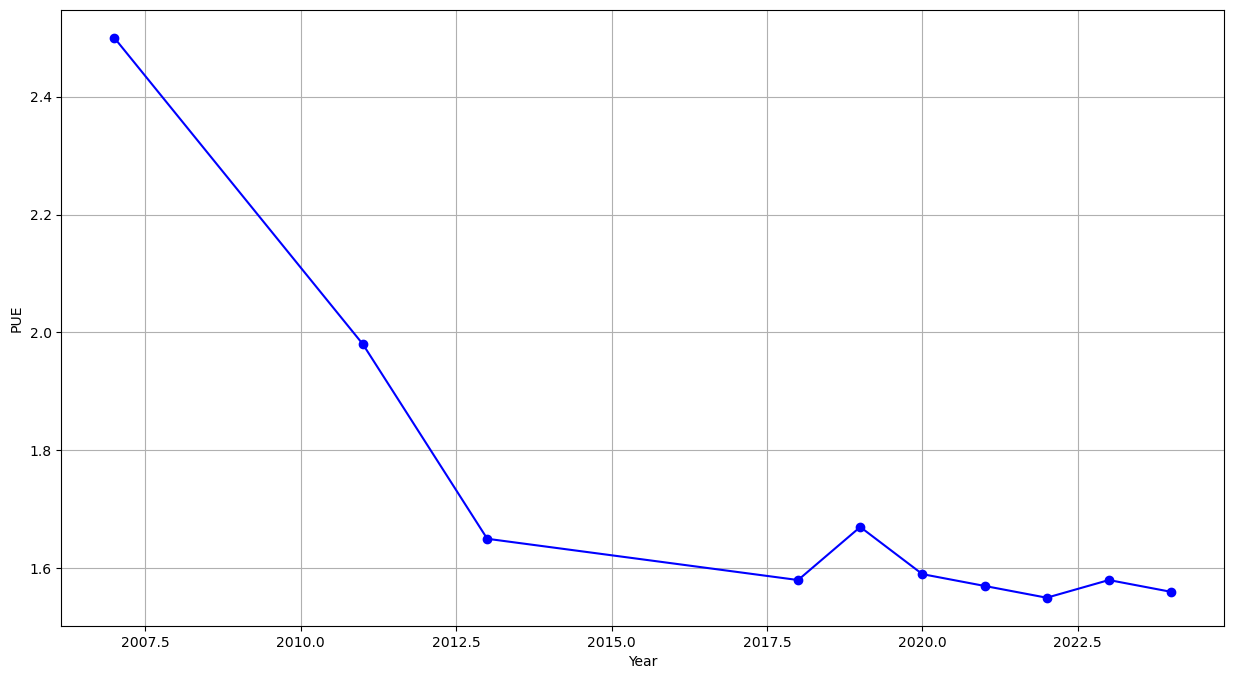

In [53]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(pue["Year"], pue["PUE"], color = "blue", zorder = 3, marker = "o")

plt.grid(which = "both", zorder = 0)
#plt.minorticks_on()

plt.xlabel("Year")
plt.ylabel("PUE")

plt.show()

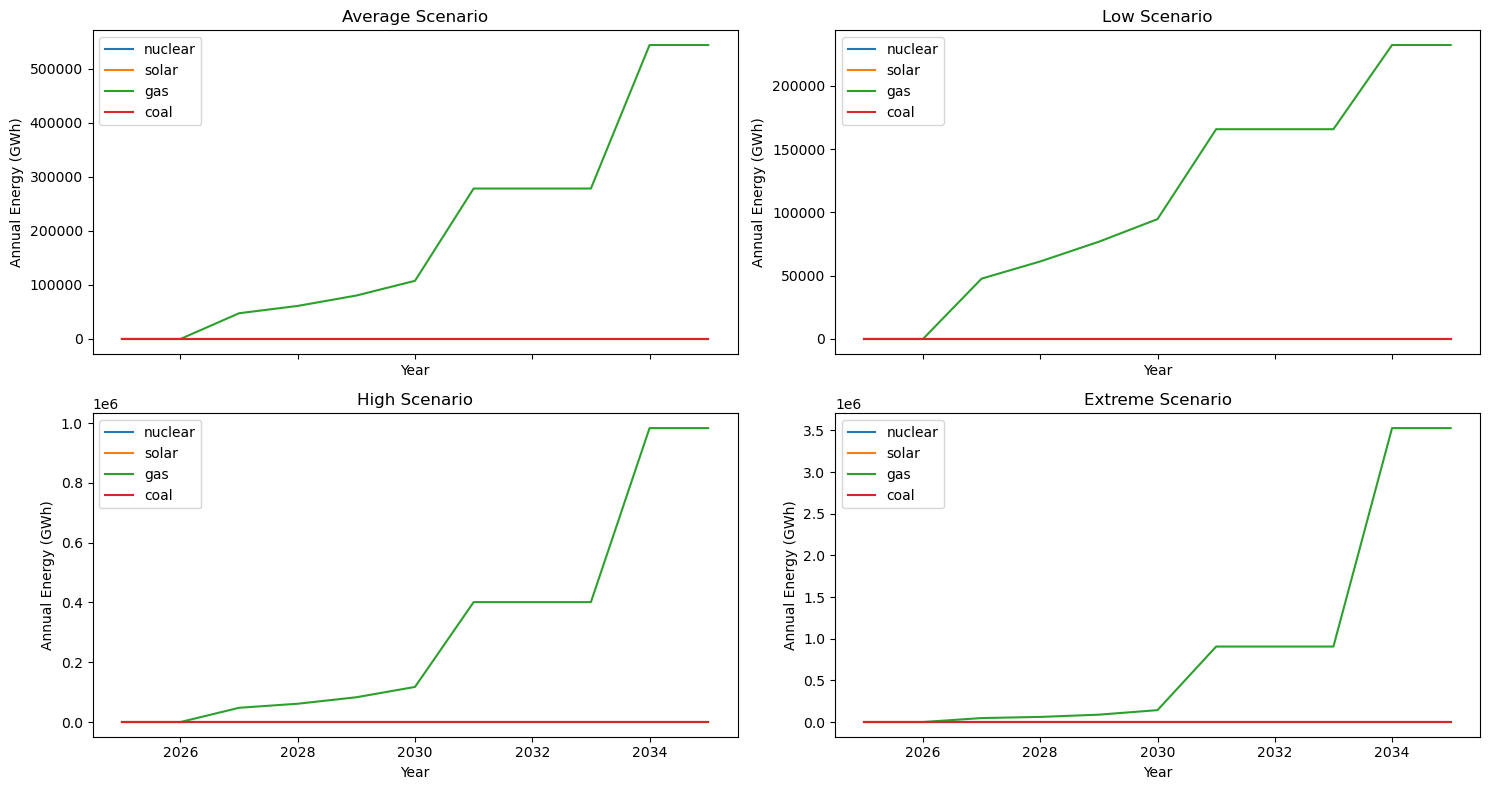

In [123]:
import pulp
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# 1. Define Scenarios
# =======================

average_consumption = [
    0.068874624, 0.241061184, 0.464903712, 0.77483952, 1.20530592,
    1.739084256, 2.358955872, 3.254325984, 4.39075728, 5.802687072,
    8.00667504, 10.899409248, 14.37757776, 18.613367136, 23.744526624,
    30.012117408, 37.62276336, 47.644021152, 61.21232208, 80.44164541931595,
    107.69390626244757, 146.31646764730934, 201.05329320882487,
    278.6276426336695, 388.5678817132059, 544.3778402688438
]

low_consumption = [
    0.068874624, 0.241061184, 0.464903712, 0.77483952, 1.20530592,
    1.739084256, 2.358955872, 3.254325984, 4.39075728, 5.802687072,
    8.00667504, 10.899409248, 14.37757776, 18.613367136, 23.744526624,
    30.012117408, 37.62276336, 47.644021152, 61.21232208, 76.78065128006835,
    94.64382186921209, 115.14010373711149, 138.65762926887197,
    165.64174329997408, 196.60343648747212, 232.1290217978456
]

high_consumption = [
    0.068874624, 0.241061184, 0.464903712, 0.77483952, 1.20530592,
    1.739084256, 2.358955872, 3.254325984, 4.39075728, 5.802687072,
    8.00667504, 10.899409248, 14.37757776, 18.613367136, 23.744526624,
    30.012117408, 37.62276336, 47.644021152, 61.21232208, 82.86633639370461,
    117.424556939248, 172.57694531273185, 260.5961168812132,
    401.0682667206304, 625.2515273544265, 983.0315884259901
]

extreme_consumption = [
    0.068874624, 0.241061184, 0.464903712, 0.77483952, 1.20530592,
    1.739084256, 2.358955872, 3.254325984, 4.39075728, 5.802687072,
    8.00667504, 10.899409248, 14.37757776, 18.613367136, 23.744526624,
    30.012117408, 37.62276336, 47.644021152, 61.21232208, 88.3743838372411,
    142.7494749278048, 251.60168789793724, 469.5103668693518,
    905.7366141400071, 1779.0076545871923, 3527.188363233445
]

scenarios = {
    "Average": average_consumption,
    "Low": low_consumption,
    "High": high_consumption,
    "Extreme": extreme_consumption
}

# We have 26 data points covering 2010 to 2035.
# We only need the last 11 points (2025-2035).
# The index of year 2025 in a 2010-based list is 2025-2010=15 (0-based index).
# So let's slice from index 15 to the end (inclusive: up to index 25).
start_index = 15  # corresponds to year 2025
end_index   = 26  # just after year 2035
years_list = list(range(2025, 2036))  # [2025..2035]


# =======================
# 2. Optimization Setup
# =======================

# Technologies
techs = ["nuclear", "solar", "gas", "coal"]

# Lead times (years)
lead_time = {
    "nuclear": 6,
    "solar":   2,
    "gas":     2,
    "coal":    4
}

# Overnight capital cost [$/kW] (example)
capex = {
    "nuclear": 7400,  
    "solar":   1448,
    "gas":     1300,
    "coal":    4500
}

# Capacity factors (approximate)
capacity_factor = {
    "nuclear": 0.90,
    "solar":   0.25,
    "gas":     0.50,
    "coal":    0.85
}

# Big penalty for unmet demand
penalty_for_shortage = 1e6

HOURS_PER_YEAR = 8760

def optimize_power_mix(demand_twh):
    """
    Run the LP optimization for a single scenario, given a list of TWh from 2025..2035.
    Return a DataFrame of annual energy supply (GWh) by technology for 2025..2035.
    """
    # Convert TWh -> MWh
    # 1 TWh = 1e6 MWh
    demand_mwh = [val * 1e6 for val in demand_twh]
    
    # Build a dictionary: year -> demand (MWh)
    demand_dict = {year: demand_mwh[i] for i, year in enumerate(years_list)}

    # Create LP model
    model = pulp.LpProblem("Power_Plant_Build", pulp.LpMinimize)

    # Decision variables: capacity built in year t (MW)
    x = pulp.LpVariable.dicts(
        "BuildCapacity",
        [(tech, t) for tech in techs for t in years_list],
        lowBound=0,
        cat=pulp.LpContinuous
    )

    # Shortage variables
    shortage = pulp.LpVariable.dicts(
        "Shortage",
        [t for t in years_list],
        lowBound=0,
        cat=pulp.LpContinuous
    )

    # Helper to compute "online capacity" for each tech in a given year y
    def online_capacity(tech, y):
        return pulp.lpSum(
            x[(tech, t)]
            for t in years_list
            if t + lead_time[tech] <= y
        )

    # Objective: sum of capital costs + shortage penalty
    model += (
        pulp.lpSum(
            capex[tech] * x[(tech, t)] * 1000  # $/kW -> $/MW
            for tech in techs for t in years_list
        )
        + pulp.lpSum(
            penalty_for_shortage * shortage[t]
            for t in years_list
        ),
        "Total_Cost"
    )

    # Constraints: meet annual energy demand
    for y in years_list:
        model += (
            pulp.lpSum(
                online_capacity(tech, y)
                * capacity_factor[tech]
                * HOURS_PER_YEAR
                for tech in techs
            )
            + shortage[y] >= demand_dict[y],
            f"MeetDemand_{y}"
        )

    # Solve
    model.solve(pulp.PULP_CBC_CMD(msg=False))

    # Build a DataFrame with annual generation for each tech
    df_energy = pd.DataFrame(index=years_list, columns=techs, data=0.0)

    for y in years_list:
        for tech in techs:
            # sum capacity that is online
            cap_online = sum(
                pulp.value(x[(tech, t)]) 
                for t in years_list
                if t + lead_time[tech] <= y
            )
            # annual energy = cap_online(MW) * CF * hours
            # convert MWh -> GWh for convenience
            df_energy.loc[y, tech] = cap_online * capacity_factor[tech] * HOURS_PER_YEAR / 1e3

    return df_energy


# ==============================
# 3. Run Optimization for Each Scenario & Plot
# ==============================

fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=False)
axs = axs.flatten()  # flatten to a 1D array of Axes for easier iteration

scenario_names = list(scenarios.keys())  # ["Average", "Low", "High", "Extreme"]

for i, scenario_name in enumerate(scenario_names):
    # Slice 2025..2035 portion from the scenario
    data_slice = scenarios[scenario_name][start_index:end_index]  # 11 values
    # Optimize
    df_result = optimize_power_mix(data_slice)

    ax = axs[i]
    for tech in techs:
        ax.plot(df_result.index, df_result[tech], label=tech)
    ax.set_title(f"{scenario_name} Scenario")
    ax.set_xlabel("Year")
    ax.set_ylabel("Annual Energy (GWh)")
    ax.legend()

plt.tight_layout()
plt.show()
